# Imports

In [3]:
%matplotlib inline

In [4]:
!pip install transformers

In [5]:
import torch
import torchvision
import torchvision.transforms as transforms
from sklearn.decomposition import PCA
import plotly.express as px
import pandas as pd
import tensorflow

torch.cuda.empty_cache()

import tensorflow as tf

# Display the version
print(tf.__version__)

# other imports
import numpy as np
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model
import random
from scipy.stats import multivariate_normal

2.14.0


In [6]:
def get_default_device():
    """Picking GPU if available or else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')
device = get_default_device()
print(device)

cuda


In [7]:
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [8]:
from google.colab.patches import cv2_imshow

# Extracting image features using CLIP

Reference: https://codeandlife.com/2023/01/26/mastering-the-huggingface-clip-model-how-to-extract-embeddings-and-calculate-similarity-for-text-and-images/


## Torchvision

In [ ]:
"""
from PIL import Image
import requests
from transformers import AutoProcessor, AutoTokenizer, CLIPModel

model = CLIPModel.from_pretrained("openai/clip-vit-large-patch14")

# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

processor = AutoProcessor.from_pretrained("openai/clip-vit-large-patch14")

def pil(img):
    print(img.shape)
    img = img / 2 + 0.5     # unnormalize
    return img

images = pil(images)

print(len(images))

inputs = processor(images=images, return_tensors="pt")

image_features = model.get_image_features(**inputs)

print(image_features.shape) # output shape of image features
"""

'\nfrom PIL import Image\nimport requests\nfrom transformers import AutoProcessor, AutoTokenizer, CLIPModel\n\nmodel = CLIPModel.from_pretrained("openai/clip-vit-large-patch14")\n\n# get some random training images\ndataiter = iter(trainloader)\nimages, labels = next(dataiter)\n\nprocessor = AutoProcessor.from_pretrained("openai/clip-vit-large-patch14")\n\ndef pil(img):\n    print(img.shape)\n    img = img / 2 + 0.5     # unnormalize\n    return img\n\nimages = pil(images)\n\nprint(len(images))\n\ninputs = processor(images=images, return_tensors="pt")\n\nimage_features = model.get_image_features(**inputs)\n\nprint(image_features.shape) # output shape of image features\n'

## Keras

In [ ]:
"""
from PIL import Image
import requests
from transformers import AutoProcessor, AutoTokenizer, CLIPModel

model = CLIPModel.from_pretrained("openai/clip-vit-large-patch14")
processor = AutoProcessor.from_pretrained("openai/clip-vit-large-patch14")

print(np.min(x_train1[0][0]))
print(np.max(x_train1[0][0]))

#b,g,r = cv2.split(x_train1[0])
#print(b.shape)
#def transform(img):
  #print(img.shape)
  #b,g,r = cv2.split(img)
  #new_ch = []
  #for ch in [b,g,r]:
    #mean = np.mean(ch)
    #std_dev = np.std(ch)
    #ch = (ch-mean)/std_dev
    #new_ch.append(ch)
  #img = cv2.merge(new_ch)

  #return img


def transform(img):
  img = np.moveaxis(img,2,0)
  #print(img.shape)
  img_tensor = torch.from_numpy(img).float()
  #print(img_tensor.shape)
  img = torchvision.transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)).forward(img_tensor)

  return img.numpy()

x_train1_norm = np.array([transform(img) for img in x_train1])
#x_train1_norm = transform(x_train1)
#print(x_train1_norm.shape)
#print(np.min(x_train1_norm[0][0]))
#print(np.max(x_train1_norm[0][0]))

def pil(img):
    img = torch.from_numpy(img)
    #print(img.shape)
    #print("Here")
    img = img / 2 + 0.5     # unnormalize
    return img

x_train1 = pil(x_train1_norm)

print(len(x_train1))

inputs = processor(images=x_train1, return_tensors="pt")

image_features = model.get_image_features(**inputs)

print(image_features.shape) # output shape of image features
"""

'\nfrom PIL import Image\nimport requests\nfrom transformers import AutoProcessor, AutoTokenizer, CLIPModel\n\nmodel = CLIPModel.from_pretrained("openai/clip-vit-large-patch14")\nprocessor = AutoProcessor.from_pretrained("openai/clip-vit-large-patch14")\n\nprint(np.min(x_train1[0][0]))\nprint(np.max(x_train1[0][0]))\n\n#b,g,r = cv2.split(x_train1[0])\n#print(b.shape)\n#def transform(img):\n  #print(img.shape)\n  #b,g,r = cv2.split(img)\n  #new_ch = []\n  #for ch in [b,g,r]:\n    #mean = np.mean(ch)\n    #std_dev = np.std(ch)\n    #ch = (ch-mean)/std_dev\n    #new_ch.append(ch)\n  #img = cv2.merge(new_ch)\n\n  #return img\n\n\ndef transform(img):\n  img = np.moveaxis(img,2,0)\n  #print(img.shape)\n  img_tensor = torch.from_numpy(img).float()\n  #print(img_tensor.shape)\n  img = torchvision.transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)).forward(img_tensor)\n\n  return img.numpy()\n\nx_train1_norm = np.array([transform(img) for img in x_train1])\n#x_train1_norm = transform(x_train

## T-distributed Stochastic Neighbour Embedding (t-SNE) Plots of CLIP Features

In [ ]:
def features_all_classes(X,y,num_samples=200):
    X_sub = []
    y_sub = []
    for i in range(num_samples):
      ind = random.randint(0,len(X)-1)
      X_sub.append(X[ind])
      y_sub.append(y[ind])

    X_sub=np.array(X_sub)
    y_sub=np.array(y_sub)

    print(X_sub.shape)
    #print(y_train1)
    print(y_sub.shape)
    #print(y_test1)

    from PIL import Image
    import requests
    from transformers import AutoProcessor, AutoTokenizer, CLIPModel

    #model = CLIPModel.from_pretrained("openai/clip-vit-large-patch14")
    #processor = AutoProcessor.from_pretrained("openai/clip-vit-large-patch14")
    model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
    processor = AutoProcessor.from_pretrained("openai/clip-vit-base-patch32")

    def transform(img):
      img = np.moveaxis(img,2,0)
      #print(img.shape)
      img_tensor = torch.from_numpy(img).float()
      #print(img_tensor.shape)
      img = torchvision.transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)).forward(img_tensor)

      return img.numpy()

    X_sub_norm = np.array([transform(img) for img in X_sub])

    def pil(img):
        img = torch.from_numpy(img)
        #print(img.shape)
        #print("Here")
        img = img / 2 + 0.5     # unnormalize
        return img

    X_sub_pil = pil(X_sub_norm)

    print(len(X_sub_pil))

    inputs = processor(images=X_sub_pil, return_tensors="pt")

    image_features = model.get_image_features(**inputs)

    print(image_features.shape) # output shape of image features

    features_np_all = np.vstack(image_features.cpu().detach().numpy())
    print("Shape of features\n",features_np_all.shape)
    return features_np_all,y_sub

In [ ]:
torch.cuda.empty_cache()
with torch.device('cuda'):
  # Load in the data
  cifar10 = tf.keras.datasets.cifar10

  # Distribute it to train and test set
  (x_train, y_train), (x_test, y_test) = cifar10.load_data()
  print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)
  features_all,y = features_all_classes(x_train,y_train,num_samples=100)

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)
(100, 32, 32, 3)
(100, 1)
100
torch.Size([100, 512])
Shape of features
 (100, 512)


In [ ]:
print(y.shape)

(100, 1)


In [ ]:
import plotly.express as px
from sklearn.manifold import TSNE

y = y.flatten()
X = features_all
#X = X.flatten()
#X = pd.DataFrame(X)
print(type(X))
print(X.shape)
#pca = PCA(n_components=2)
tsne = TSNE(n_components=2)
#X_pca = pca.fit_transform(X)
X_tsne = tsne.fit_transform(X)
print(tsne.kl_divergence_)
#fig = px.scatter(x=X_pca[:, 0], y=X_pca[:, 1])#, color='petal_length')
fig = px.scatter(x=X_tsne[:, 0], y=X_tsne[:, 1], color=y)
fig.update_layout(
    title="TSNE visualization of CIFAR10 dataset",
    #xaxis_title="First Principal Component",
    #yaxis_title="Second Principal Component",
    xaxis_title="First TSNE",
    yaxis_title="Second TSNE",
)
fig.show()

<class 'numpy.ndarray'>
(100, 512)
0.2540407180786133


Different values of y correspond to different classes.

###**KL Divergence Interpretation**
---
To put this in connection with t-SNE: With the KL divergence as a measure for similarity of two distribution we can now optimize the target distribution $q_{ij}$ by minimizing the KL divergence to the true high-dimensional distribution $p_{ij}$. Note however, that we are not generating new samples, but rather optimze the coordinates $y_{ij}$ of the target distrbution. t-SNE generally does that using gradient-decent methods which are often (but not exclusively) used in Neural Networks. \

---


A low KL divergence means that the separation is decent. Thus, t-SNE can be used for dimensionality reduction of CLIP features.

# Anomaly Detection
---
Reference: https://medium.com/@eyalbetzalel/synthetic-images-anomaly-detection-with-clip-e4fdf6af0169

In [38]:
def calc_log_prob(batch_feature_source_np, batch_feature_test_np):
    mu1 = np.mean(batch_feature_source_np, axis=0)
    sigma1 = np.cov(batch_feature_source_np, rowvar=False)
    print("Mean shape=",mu1.shape)
    print("Variance shape=",sigma1.shape)
    #print("Variance row=",sigma1[1])
    m = multivariate_normal(mu1, sigma1, allow_singular=True)
    prob = m.pdf(batch_feature_test_np)
    print("Probablities of the test images belonging to the Gaussian distribution")
    print(prob)
    return prob

def outlier_detection(prob, outlier_precent = 0.3):
    sorted_ind = np.argsort(prob)
    #print(sorted_ind)
    ind = int(np.floor(sorted_ind.shape[0] * outlier_precent))
    #print(ind)
    low_prob = sorted_ind[:ind]
    high_prob = sorted_ind[-ind:]

    return low_prob


## Single Class 'Cat' with all CLIP features

### Method Used to detect anomalies
1. Fit a Gaussian model to the CLIP features of the train set.
2. Calculate the probability of features of the test samples belonging to the corresponded Gaussian model and rank them by their score.
3. The test samples with the lowest probability scores are the outliers.
*Reference:* [*Synthetic Images Anomaly Detection with CLIP*](https://medium.com/@eyalbetzalel/synthetic-images-anomaly-detection-with-clip-e4fdf6af0169)

In [10]:
def gpu():
  #with tf.device('/device:GPU:0'):
  with torch.device('cuda'):
    # Load in the data
    cifar10 = tf.keras.datasets.cifar10

    # Distribute it to train and test set
    (x_train, y_train), (x_test, y_test) = cifar10.load_data()
    print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

    x_train1=[]
    y_train1=[]
    x_test1=[]
    y_test1=[]
    #Only keeping images belonging to the class 'cat'
    for i in range(len(y_train)):
      if(y_train[i]==3):
        x_train1.append(x_train[i])
        y_train1.append(y_train[i])
    for i in range(len(y_test)):
      if(y_test[i]==3):
        x_test1.append(x_test[i])
        y_test1.append(y_test[i])

    x_train_sub = []
    y_train_sub = []
    for i in range(200):
      ind = random.randint(0,len(x_train1)-1)
      x_train_sub.append(x_train1[ind])
      y_train_sub.append(y_train1[ind])

    x_test_sub = []
    y_test_sub = []
    for i in range(4):
      ind = random.randint(0,len(x_test1)-1)
      x_test_sub.append(x_test1[ind])
      y_test_sub.append(y_test1[ind])

    x_train1=np.array(x_train_sub)
    y_train1=np.array(y_train_sub)
    x_test1=np.array(x_test_sub)
    y_test1=np.array(y_test_sub)

    x_train1_copy = x_train1.copy()
    y_train1_copy = y_train1.copy()
    x_test1_copy = x_test1.copy()
    y_test1_copy = y_test1.copy()

    print(x_train1.shape)
    #print(y_train1)
    print(x_test1.shape)
    #print(y_test1)

    # visualize data by plotting images
    #Train
    print("Training/Source images")
    fig, ax = plt.subplots(20, 10)
    k = 0

    for i in range(20):
        for j in range(10):
            ax[i][j].imshow(x_train1[k])
            k += 1

    plt.show()

    #Test
    print("Test images")
    fig, ax2 = plt.subplots(2,2)
    k = 0

    for i in range(2):
        for j in range(2):
          ax2[i][j].imshow(x_test1[k])
          k += 1

    plt.show()
    #plt.imshow(x_test1[0],asp)

    from PIL import Image
    import requests
    from transformers import AutoProcessor, AutoTokenizer, CLIPModel

    #model = CLIPModel.from_pretrained("openai/clip-vit-large-patch14")
    #processor = AutoProcessor.from_pretrained("openai/clip-vit-large-patch14")
    model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
    processor = AutoProcessor.from_pretrained("openai/clip-vit-base-patch32")

    print(np.min(x_train1[0][0]))
    print(np.max(x_train1[0][0]))

    #b,g,r = cv2.split(x_train1[0])
    #print(b.shape)
    """def transform(img):
        #print(img.shape)
        b,g,r = cv2.split(img)
        new_ch = []
        for ch in [b,g,r]:
          mean = np.mean(ch)
          std_dev = np.std(ch)
          ch = (ch-mean)/std_dev
          new_ch.append(ch)
        img = cv2.merge(new_ch)

        return img"""

    def transform(img):
      img = np.moveaxis(img,2,0)
      #print(img.shape)
      img_tensor = torch.from_numpy(img).float()
      #print(img_tensor.shape)
      img = torchvision.transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)).forward(img_tensor)

      return img.numpy()

    x_train1_norm = np.array([transform(img) for img in x_train1])
    x_test1_norm = np.array([transform(img) for img in x_test1])
    #x_train1_norm = transform(x_train1)
    #print(x_train1_norm.shape)
    #print(np.min(x_train1_norm[0][0]))
    #print(np.max(x_train1_norm[0][0]))

    def pil(img):
        img = torch.from_numpy(img)
        #print(img.shape)
        #print("Here")
        img = img / 2 + 0.5     # unnormalize
        return img

    x_train1 = pil(x_train1_norm)
    x_test1 = pil(x_test1_norm)

    print(len(x_train1))

    inputs = processor(images=x_train1, return_tensors="pt")

    image_features = model.get_image_features(**inputs)

    test_inputs = processor(images=x_test1, return_tensors="pt")

    test_image_features = model.get_image_features(**test_inputs)

    print(image_features.shape) # output shape of image features

    feature_np = np.vstack(image_features.cpu().detach().numpy())
    test_feature_np = np.vstack(test_image_features.cpu().detach().numpy())

    print("Shape of features\n",feature_np.shape)

    prob = calc_log_prob(feature_np, test_feature_np)
    a = outlier_detection(prob)
    print("Low probability indices")
    print(a)
    for ind in a:
      img = np.moveaxis(x_test1[ind].numpy().astype(int),0,2)
      print(np.max(img))
      print(np.min(img))
      print(img.shape)
      print(img.dtype)
      #plt.imshow(img.astype(int),aspect='auto')
      print("Anomaly", (ind+1))
      plt.imshow(x_test1_copy[ind])

      return feature_np, test_feature_np
      #return image_features, test_image_features


(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)
(200, 32, 32, 3)
(4, 32, 32, 3)
Training/Source images


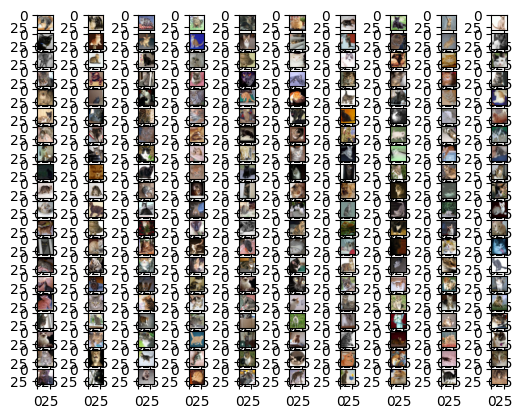

Test images


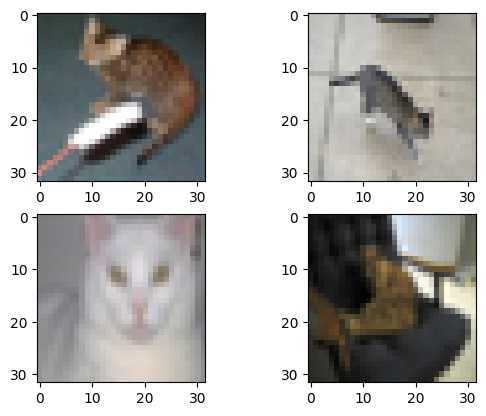

103
248
200
torch.Size([200, 512])
Shape of features
 (200, 512)
Mean shape= (512,)
Variance shape= (512, 512)
Probablities of the test images belonging to the Gaussian distribution
[0. 0. 0. 0.]
[0 1 2 3]
1
Low probability indices
[0]
255
11
(32, 32, 3)
int64
Anomaly 1


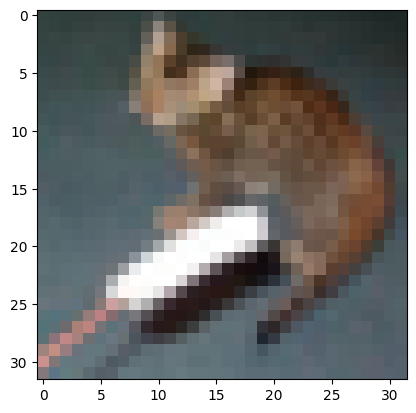

In [11]:
torch.cuda.empty_cache()
feature_np, test_feature_np = gpu()

### Reason for 0 test probabilities - Poor Gaussian modelling
---
The probabilities of those features belonging to the Gaussian using which it was modelled are very low. Hence, we can conclude that the Gaussian model is very poor due to insufficient training data.

In [12]:
arr = np.array([np.array([1,1,1]),np.array([1,2,1])])
arr1 = np.array([1,3,1])
calc_log_prob(arr,arr1)
calc_log_prob(test_feature_np, test_feature_np)

Mean shape= (3,)
Variance shape= (3, 3)
Probablities of the test images belonging to the Gaussian distribution
0.059465144611814666
Mean shape= (512,)
Variance shape= (512, 512)
Probablities of the test images belonging to the Gaussian distribution
[0.00103816 0.00103816 0.00103816 0.00103816]


array([0.00103816, 0.00103816, 0.00103816, 0.00103816])

### **Future Work:**
Fit a multivariate gaussian to all classes of CIFAR10 and detect anomalies which have a low probability of belonging to this Gaussian (i.e. images that might not belong to any of the CIFAR10 classes).

## All classes with TSNE selected features

### Method Used to detect anomalies
1. Extract CLIP features of samples from all classes. We have 512 such features.
2. Reduce dimensionality using TSNE.
2. Fit a Gaussian model to the TSNE features of the train set.
2. Calculate the probability of the TSNE features of the test samples belonging to the corresponded Gaussian model and rank them by their score.
3. The test samples with the lowest probability scores are the outliers.
*Reference:* [*Synthetic Images Anomaly Detection with CLIP*](https://medium.com/@eyalbetzalel/synthetic-images-anomaly-detection-with-clip-e4fdf6af0169)

In [86]:
from sklearn.manifold import TSNE
import math
import matplotlib.gridspec as gridspec
def anomaly_detection(num_train_samples=200,num_test_samples=50):
  #with tf.device('/device:GPU:0'):
  with torch.device('cuda'):
    # Load in the data
    cifar10 = tf.keras.datasets.cifar10

    # Distribute it to train and test set
    (x_train, y_train), (x_test, y_test) = cifar10.load_data()
    print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

    x_train1=x_train
    y_train1=y_train
    x_test1=x_test
    y_test1=y_test

    x_train_sub = []
    y_train_sub = []
    for i in range(num_train_samples):
      ind = random.randint(0,len(x_train1)-1)
      x_train_sub.append(x_train1[ind])
      y_train_sub.append(y_train1[ind])

    x_test_sub = []
    y_test_sub = []
    for i in range(num_test_samples):
      ind = random.randint(0,len(x_test1)-1)
      x_test_sub.append(x_test1[ind])
      y_test_sub.append(y_test1[ind])

    x_train1=np.array(x_train_sub)
    y_train1=np.array(y_train_sub)
    x_test1=np.array(x_test_sub)
    y_test1=np.array(y_test_sub)

    x_train1_copy = x_train1.copy()
    y_train1_copy = y_train1.copy()
    x_test1_copy = x_test1.copy()
    y_test1_copy = y_test1.copy()

    print(x_train1.shape)
    #print(y_train1)
    print(x_test1.shape)
    #print(y_test1)

    # visualize data by plotting images
    #Train
    print("Training/Source images")
    fig, ax = plt.subplots(math.floor(num_train_samples/3), 3,figsize=(10,int(10*num_train_samples/9)))
    k = 0

    for i in range(math.floor(num_train_samples/3)):
        for j in range(3):
            ax[i][j].imshow(x_train1[k])
            ax[i][j].tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False)
            k += 1
            plt.subplots_adjust(wspace=0, hspace=0)
    plt.tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False)
    #plt.subplot_tool()
    plt.subplots_adjust(wspace=0, hspace=0)
    plt.show()

    #Test
    print("Test images")
    fig, ax2 = plt.subplots(math.floor(num_test_samples/3),3,figsize=(10,int(10*num_test_samples/9)))
    k = 0

    for i in range(math.floor(num_test_samples/3)):
        for j in range(3):
          ax2[i][j].imshow(x_test1[k])
          ax2[i][j].tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False)
          k += 1
          plt.subplots_adjust(wspace=0, hspace=0)

    plt.tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False)
    #plt.subplot_tool()
    plt.subplots_adjust(wspace=0, hspace=0)
    plt.show()
    #plt.imshow(x_test1[0],asp)

    from PIL import Image
    import requests
    from transformers import AutoProcessor, AutoTokenizer, CLIPModel

    #model = CLIPModel.from_pretrained("openai/clip-vit-large-patch14")
    #processor = AutoProcessor.from_pretrained("openai/clip-vit-large-patch14")
    model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
    processor = AutoProcessor.from_pretrained("openai/clip-vit-base-patch32")

    print(np.min(x_train1[0][0]))
    print(np.max(x_train1[0][0]))

    #b,g,r = cv2.split(x_train1[0])
    #print(b.shape)
    """def transform(img):
        #print(img.shape)
        b,g,r = cv2.split(img)
        new_ch = []
        for ch in [b,g,r]:
          mean = np.mean(ch)
          std_dev = np.std(ch)
          ch = (ch-mean)/std_dev
          new_ch.append(ch)
        img = cv2.merge(new_ch)

        return img"""

    def transform(img):
      img = np.moveaxis(img,2,0)
      #print(img.shape)
      img_tensor = torch.from_numpy(img).float()
      #print(img_tensor.shape)
      img = torchvision.transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)).forward(img_tensor)

      return img.numpy()

    x_train1_norm = np.array([transform(img) for img in x_train1])
    x_test1_norm = np.array([transform(img) for img in x_test1])
    #x_train1_norm = transform(x_train1)
    #print(x_train1_norm.shape)
    #print(np.min(x_train1_norm[0][0]))
    #print(np.max(x_train1_norm[0][0]))

    def pil(img):
        img = torch.from_numpy(img)
        #print(img.shape)
        #print("Here")
        img = img / 2 + 0.5     # unnormalize
        return img

    x_train1 = pil(x_train1_norm)
    x_test1 = pil(x_test1_norm)

    print(len(x_train1))

    inputs = processor(images=x_train1, return_tensors="pt")

    image_features = model.get_image_features(**inputs)

    test_inputs = processor(images=x_test1, return_tensors="pt")

    test_image_features = model.get_image_features(**test_inputs)

    print(image_features.shape) # output shape of image features

    feature_np = np.vstack(image_features.cpu().detach().numpy())
    test_feature_np = np.vstack(test_image_features.cpu().detach().numpy())

    print("Shape of features\n",feature_np.shape)

    tsne = TSNE(n_components=2,perplexity=max(np.sqrt(num_test_samples),5))
    features_tsne = tsne.fit_transform(feature_np)
    test_features_tsne = tsne.fit_transform(test_feature_np)

    print("Shape of TSNE features\n",features_tsne.shape)

    prob = calc_log_prob(features_tsne, test_features_tsne)
    a = outlier_detection(prob)
    print("Low probability indices")
    print(a)
    for ind in a:
      img = np.moveaxis(x_test1[ind].numpy().astype(int),0,2)
      print(np.max(img))
      print(np.min(img))
      print(img.shape)
      print(img.dtype)
      #plt.imshow(img.astype(int),aspect='auto')
      print("Anomaly index", ind)
      plt.imshow(x_test1_copy[ind])

      return features_tsne, test_features_tsne
      #return image_features, test_image_features


(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)
(144, 32, 32, 3)
(18, 32, 32, 3)
Training/Source images


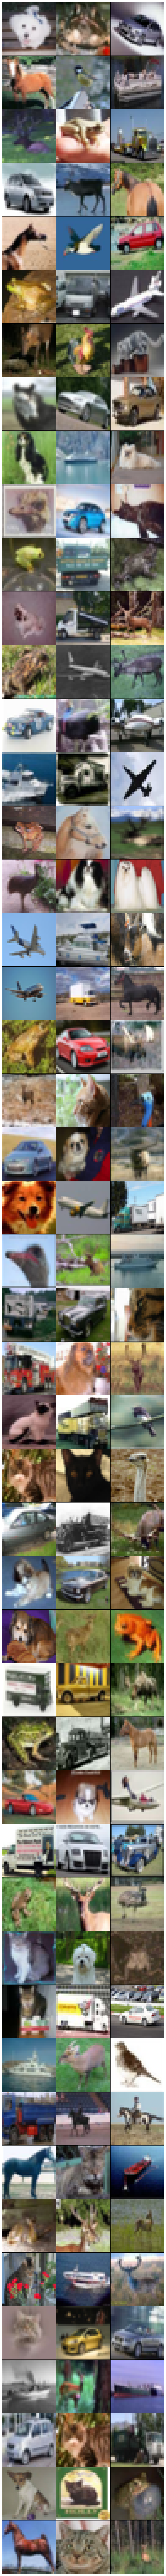

Test images


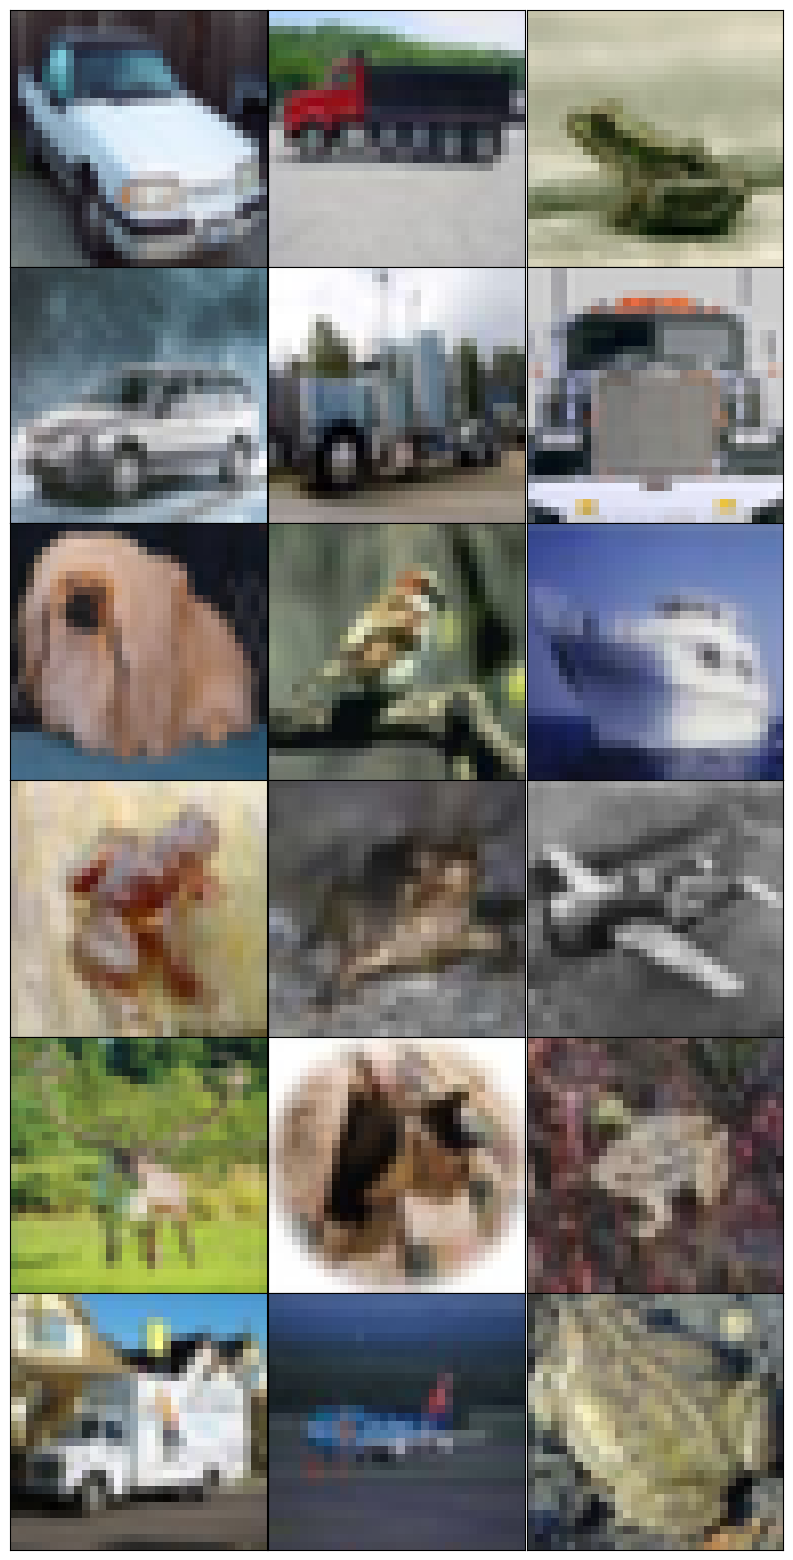

22
54
144
torch.Size([144, 512])
Shape of features
 (144, 512)
Shape of TSNE features
 (144, 2)
Mean shape= (2,)
Variance shape= (2, 2)
Probablities of the test images belonging to the Gaussian distribution
[1.01918827e-07 9.50680926e-10 1.55789957e-05 6.89269062e-07
 7.86156609e-09 5.57860223e-08 4.57538486e-08 9.61178841e-07
 1.65251212e-05 1.22203568e-05 6.72729227e-05 7.93357782e-05
 1.10850580e-07 1.10213945e-06 6.45167025e-06 2.49002764e-09
 3.30102860e-05 2.24050941e-05]
Low probability indices
[ 1 15  4  6  5]
255
7
(32, 32, 3)
int64
Anomaly index 1


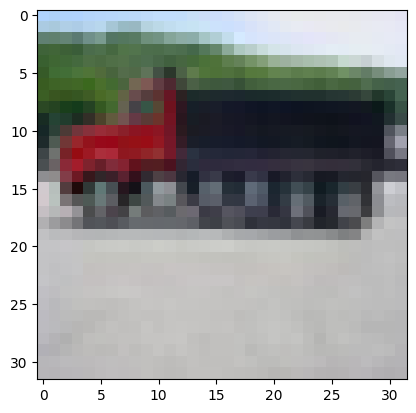

In [87]:
torch.cuda.empty_cache()
features_tsne, test_features_tsne = anomaly_detection(num_train_samples=36*4,num_test_samples=9*2)

### CIFAR10 Classes
---
1. airplane
2. automobile
3. bird
4. cat
5. deer
6. dog
7. frog
8. horse
9. ship
10. truck

### What can be varied?
---
1. Perplexity of TSNE
2. Number of TSNE components
3. Modelling of TSNE features (some other model instead of a multivariate Gaussian)